In [1]:
import pandas as pd

pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

import numpy as np

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

import glob

In [2]:
file = "/Users/zarreennaowalreza/Desktop/SpaceApps/SCISAT/scisat_merge.csv"

# cols = ['Alt_Mean', 'std CO', 'date', 'long', 'lat']

df = pd.read_csv(file).fillna('nan')
print(df.shape)
df.head()

(98513, 63)


,Alt_Mean_CO2_636,std CO2_636,date,lat,long,Alt_Mean_std CF4,std CF4,Alt_Mean_std CO2_627,std CO2_627,Alt_Mean_std CFC113,...,Alt_Mean_std CO2_638,std CO2_638,Alt_Mean_std CCl4,std CCl4,Alt_Mean_std CH4,std CH4,Alt_Mean_std C3H6O,std C3H6O,Alt_Mean_std CO2_628,std CO2_628
0,0.000246862,0.000131791,2004-02-01,-23.44,-88.55,4.43659e-11,3.3591e-11,0.000215886,0.000153334,6.71625e-11,...,0.000224543,0.000158729,8.80508e-12,2.54771e-11,4.29061e-07,6.0332e-07,4.34242e-11,5.99133e-11,0.000265356,0.000148354
1,0.000234959,0.000135114,2004-02-01,-22.86,-137.66,4.63504e-11,3.51208e-11,0.000230001,0.000147082,5.24533e-11,...,0.000219478,0.00015455,3.51793e-12,1.83803e-11,3.49202e-07,5.22462e-07,-1.45474e-11,1.89136e-11,0.000262198,0.000143065
2,0.000246868,0.000130507,2004-02-01,-22.58,-162.22,5.12874e-11,3.92073e-11,0.000232955,0.000152532,3.29628e-11,...,0.000235611,0.000159042,8.58635e-12,1.90683e-11,3.70922e-07,5.48345e-07,4.23916e-11,3.42409e-11,0.000265588,0.000147539
3,0.000233804,0.000137538,2004-02-01,-22.00,148.66,4.17212e-11,3.24906e-11,0.000235526,0.000147327,5.73765e-11,...,0.000216839,0.000158572,4.05177e-12,1.31039e-11,3.13385e-07,4.84461e-07,nan,nan,0.000266613,0.00013937
4,0.000231635,0.000143283,2004-02-01,-21.71,124.11,4.96191e-11,3.86078e-11,0.000226157,0.00015854,nan,...,0.000213843,0.000165556,1.38333e-11,1.20873e-11,3.05193e-07,4.77947e-07,nan,nan,0.000253954,0.000152443


In [16]:
min_date = df['date'].min()
max_date = df['date'].max()
print("min date", min_date)
print("max date", max_date)


min date 2004-02-01
max date 2020-09-11


In [35]:
start = '2019-08-15'
end = '2020-08-15'

df_sub = df[(df['date'] >= start) & (df['date'] <= end)]
print(df_sub.shape)

(7011, 63)


In [90]:
df_sub['chla'] = tmp['chla'].copy()

/Users/zarreennaowalreza/Desktop/SpaceApps/space_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
# df_sub = df_sub.dropna(subset=['lat', 'long'])
df_sub_drop = df_sub.dropna(how='any', axis=1)
print(df_sub_drop.shape)

(7011, 63)


In [20]:
file = '/Users/zarreennaowalreza/Desktop/SpaceApps/chloro_big.csv'

df_ch = pd.read_csv(file)
df_ch = df_ch.fillna('nan')
df_ch = df_ch.drop([0])
print(df_ch.shape)
df_ch_sub = df_ch[df_ch['chla'] != 'nan']
print(df_ch_sub.shape)

(18914688, 4)
(8638418, 4)


In [18]:
# del df_ch
del df_ch_sub

In [9]:
df_ch_sub.head()

,time,latitude,longitude,chla
1256326,2020-08-15T00:00:00Z,83.9375,-33.1042,0.369651
1256327,2020-08-15T00:00:00Z,83.9375,-33.0625,0.369651
1256328,2020-08-15T00:00:00Z,83.9375,-33.0208,0.369651
1256329,2020-08-15T00:00:00Z,83.9375,-32.9792,0.369651
1256330,2020-08-15T00:00:00Z,83.9375,-32.9375,0.369651


In [21]:
min_date = df_ch_sub['time'].min()
max_date = df_ch_sub['time'].max()
print("min date", min_date)
print("max date", max_date)

min date 2019-08-15T00:00:00Z
max date 2020-08-15T00:00:00Z


In [45]:
tmp = df_ch_sub[df_ch_sub['time'] == '2019-08-15T00:00:00Z']
tmp = tmp.dropna(how='any', axis=0)
print(tmp.shape)
# tmp.shape

(659413, 4)


In [88]:
tmp = df_ch_sub[0:98513]
print(tmp.shape)

(98513, 4)


In [25]:
tmp.head()

,time,latitude,longitude,chla
52572,2019-08-15T00:00:00Z,83.729164,-27.687494,0.46940288
52573,2019-08-15T00:00:00Z,83.729164,-27.479166,0.46937203
52574,2019-08-15T00:00:00Z,83.729164,-27.270823,0.37052014
52575,2019-08-15T00:00:00Z,83.729164,-27.062494,0.3705104
54308,2019-08-15T00:00:00Z,83.52083,-26.020823,0.67183733


In [11]:
df_ch_sub['time'].unique()

array(['2020-08-15T00:00:00Z'], dtype=object)

In [27]:
lat = -23.44
long = -88.55
df_ch_sub[(df_ch_sub['latitude'] == lat) & (df_ch_sub['longitude'] == long)]

,time,latitude,longitude,chla


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(tmp['longitude'], tmp['latitude'])]
gdf = GeoDataFrame(tmp, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [84]:
df.columns

Index(['Alt_Mean_CO2_636', 'std CO2_636', 'date', 'lat', 'long',
       'Alt_Mean_std CF4', 'std CF4', 'Alt_Mean_std CO2_627', 'std CO2_627',
       'Alt_Mean_std CFC113', 'std CFC113', 'Alt_Mean_std CCl2F2',
       'std CCl2F2', 'Alt_Mean_std CH4_212', 'std CH4_212', 'Alt_Mean_std NO2',
       'std NO2', 'Alt_Mean_std O3_668', 'std O3_668', 'Alt_Mean_std CO_36',
       'std CO_36', 'Alt_Mean_std NO', 'std NO', 'Alt_Mean_std CO_27',
       'std CO_27', 'Alt_Mean_std CO', 'std CO', 'Alt_Mean_std CH4_311',
       'std CH4_311', 'Alt_Mean_std NO2_656', 'std NO2_656',
       'Alt_Mean_std O3_686', 'std O3_686', 'Alt_Mean_std CO_28', 'std CO_28',
       'Alt_Mean_std N2', 'std N2', 'Alt_Mean_std C2H2', 'std C2H2',
       'Alt_Mean_std H2O', 'std H2O', 'Alt_Mean_std CO2', 'std CO2',
       'Alt_Mean_std O3_676', 'std O3_676', 'Alt_Mean_std O3_667',
       'std O3_667', 'Alt_Mean_std CCl3F', 'std CCl3F', 'Alt_Mean_std C2H6',
       'std C2H6', 'Alt_Mean_std O3', 'std O3', 'Alt_Mean_std CO2_63

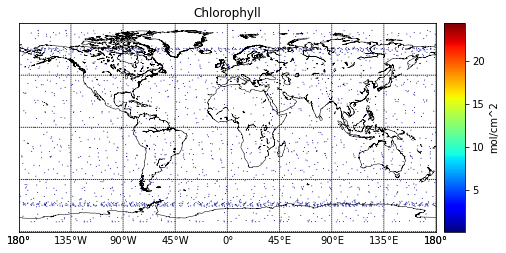

In [105]:
lat = df_sub['lat']
long = df_sub['long']
co2 = df_sub['chla'].astype('float')
# cf4 = df_sub['Alt_Mean_std O3']
# chla = df_sub['chla'].astype('float')

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])

# sc = m.scatter(long, lat, c=co2, s=1, cmap=plt.cm.jet,
#                 edgecolors=None, linewidth=0)

sc = m.scatter(long, lat, c=co2, s=1,
               cmap=plt.cm.jet,
                edgecolors=None, linewidth=0)

cb = m.colorbar()
cb.set_label('mol/cm^2')

fig = plt.gcf()
plt.title('Chlorophyll')

plt.show()

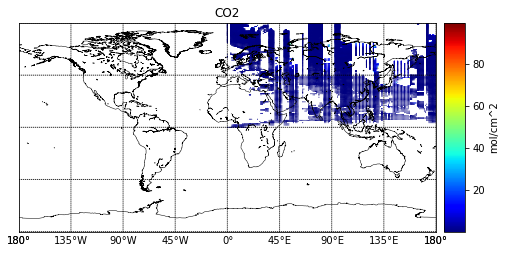

In [83]:
lat = df_ch_sub['latitude'].astype('str')
long = df_ch_sub['longitude'].astype('str')
chla = df_ch_sub['chla'].astype('float')

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='l', #,lat_0=0, lon_0=0)
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])

# sc = m.scatter(long, lat, c=co2, s=1, cmap=plt.cm.jet,
#                 edgecolors=None, linewidth=0)

sc = m.scatter(long, lat, c=chla, s=1, cmap=plt.cm.jet,
                edgecolors=None, linewidth=0)

cb = m.colorbar()
cb.set_label('mol/cm^2')

fig = plt.gcf()
plt.title('CO2')

plt.show()

In [80]:
print(type(df_sub['lat'].values[0]))
print(type(tmp['latitude'].values[0]))

<class 'numpy.float64'>
<class 'str'>


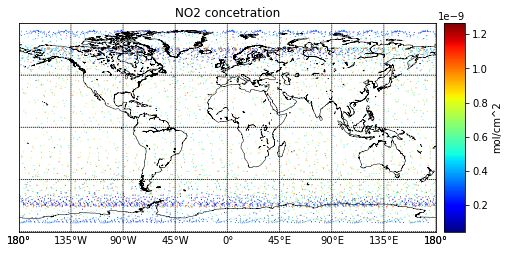

In [106]:
lat = df_sub['lat']
long = df_sub['long']
NO2 = df_sub['Alt_Mean_std NO2']

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])

sc = m.scatter(long, lat, c=NO2, s=1,
               cmap=plt.cm.jet,
                edgecolors=None, linewidth=0)

cb = m.colorbar()
cb.set_label('mol/cm^2')

fig = plt.gcf()
plt.title('NO2 concetration')

plt.show()